# Explore here

In [ ]:
# Your code here
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import numpy as np
from numpy._core.defchararray import upper

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle
from sklearn.feature_selection import f_classif, SelectKBest



# Leer el archivo CSV
df = pd.read_csv('../data/raw/rent-ny-airbnb.csv', sep=',') # Este archivo CSV contiene comas como separadores
print(df.head())
print(df.columns) 

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [63]:
print(f"Dimensiones del dataframe: {df.shape}")
print(df.info())

Dimensiones del dataframe: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64 

#### Información relevante:

id. Identificador propio de cada piso/habitación. (Numérica)  
name. Nombre del anuncio del piso/habitación. (Categórica)  
host_id. Identificador propio de cada arrendador. (Numérica)  
host_name. Nombre de cada arrendador. (Categórica)  
neighbourhood_group. Nombre de cada conjunto de vecindarios. (Categórica)  
neighbourhood. Nombre de cada vencindario. (Categórica)  
latitude. Coordenadas latitudinales de cada piso/habitación. (Numérica)  
longitude. Coordenadas logitudinales de cada piso/habitación. (Numérica)  
room_type. Tipo de piso/habitación. (Categórica)  
price. TARGET. Precio de cada piso/habitación. (Numérica)  
minimum_nights. Noches mínimas necesarias para poder alquilar la piso/habitación. (Numérica)  
number_of_reviews. Número total de reseñas de cada piso/habitación. (Numérica)  
last_review. Fecha en la que se realizo la última reseña de cada piso/habitación. (Numérica)   
reviews_per_month. Media de las reseñas por mes de cada piso/habitación. (Numérica)   
calculated_host_listings_count. Cantidad de anuncios publicados simultáneamente de cada arrendador. (Numérica)   
availability_365. Cuántos días está disponible piso/habitación para ser alquilado. (Numérica)  

Como se aprecia en el resultado anterior, se puede ver que hay varias columnas con nulos. Vamos a contabilizarlos:

In [64]:
print(f"Valores nulos por columna: {df.isnull().sum()}\n")
print(f"Valores unicos por columna: {df.nunique()}")

Valores nulos por columna: id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Valores unicos por columna: id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude  

Dada la cantidad de nulos podemos decidir si eliminar "last_review" y "reviews_per_month" ya que tienen una gran cantidad de nulos, en este caso eliminaremos "last_review" porque la otra columna da más información relevante.

### Eliminamos las columnas que no nos aportan datos relevantes

In [65]:
print(df.drop("latitude", axis = 1).duplicated().sum())
print(df.drop("longitude", axis = 1).duplicated().sum())
print("Ya que no hay duplicados en latitud ni longitud, procedemos a eliminar las columnas innecesarias.")

#dropeamos last reviews ya que tienen muchos nulos
total_dataf = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1, inplace=False)
print(total_dataf.shape)
print(total_dataf.columns)
total_dataf.head()

0


0
Ya que no hay duplicados en latitud ni longitud, procedemos a eliminar las columnas innecesarias.
(48895, 11)
Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Análisis de variables univariante

### Generamos gráficos con los valores categóricos

Hacemos un pequeño ajuste de datos ya que 'neighbourhood' tiene muchos registros. El ajuste sera mostrar el top 10 de más repetidos y crear un 11vo registro llamado otros


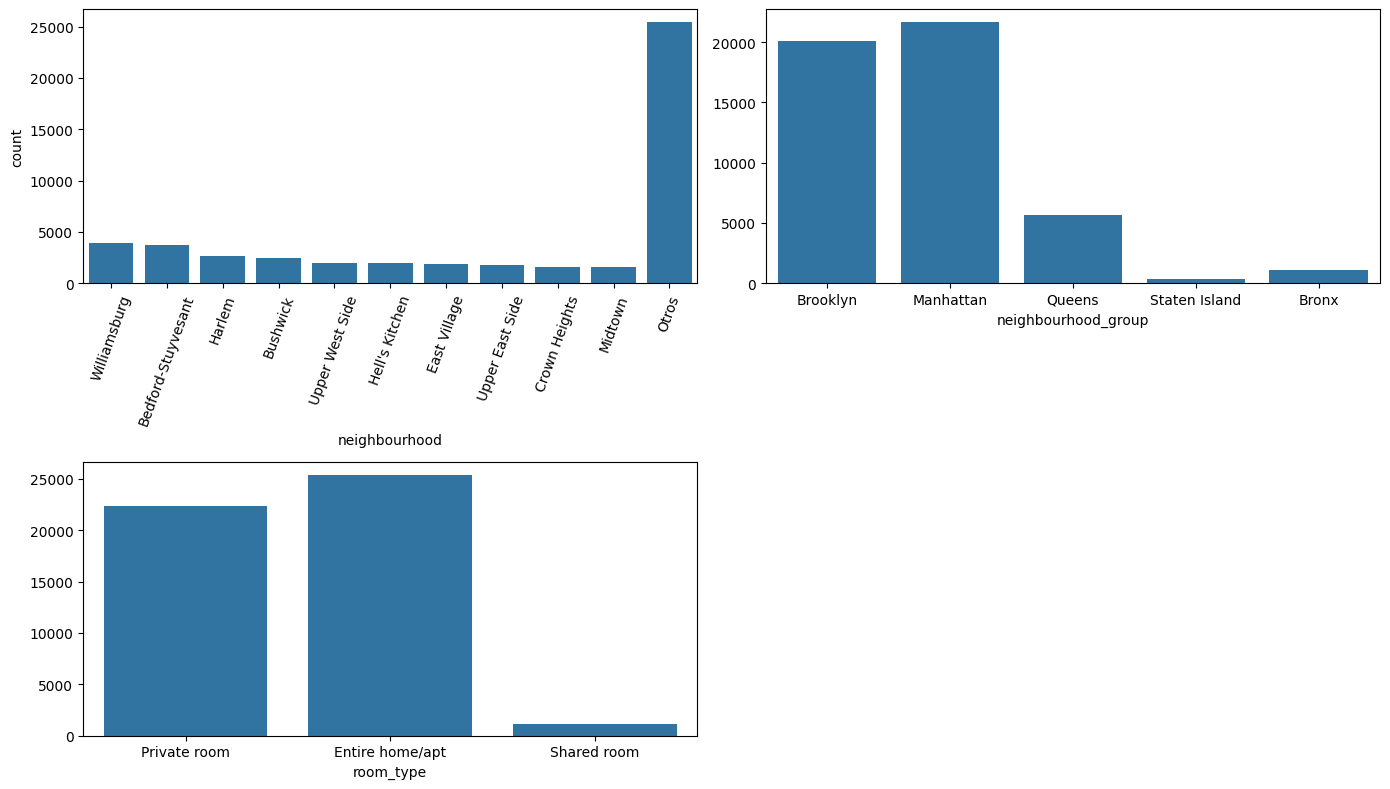

In [75]:
fig, axis = plt.subplots(2, 2, figsize = (14, 8))

# Crear un histograma múltiple

print("Hacemos un pequeño ajuste de datos ya que 'neighbourhood' tiene muchos registros. El ajuste sera mostrar el top 10 de más repetidos y crear un 11vo registro llamado otros")

top10 = total_dataf['neighbourhood'].value_counts().head(10).index

total_dataf['neighbourhood_top10'] = total_dataf['neighbourhood'].apply(
    lambda x: x if x in top10 else 'Otros'
)

sns.countplot(ax = axis[0, 0], data = total_dataf, x = "neighbourhood_top10", order = list(top10) + ["Otros"]).set(xlabel = "neighbourhood")
axis[0,0].tick_params(axis="x", rotation=70)
sns.countplot(ax = axis[0, 1], data = total_dataf, x = "neighbourhood_group").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_dataf, x = "room_type").set(ylabel = None)

fig.delaxes(axis[1, 1])

# Ajustar el layout
plt.tight_layout()
plt.show()


# Mostrar el plot
plt.show()

### Generamos gráficos con los valores numéricos

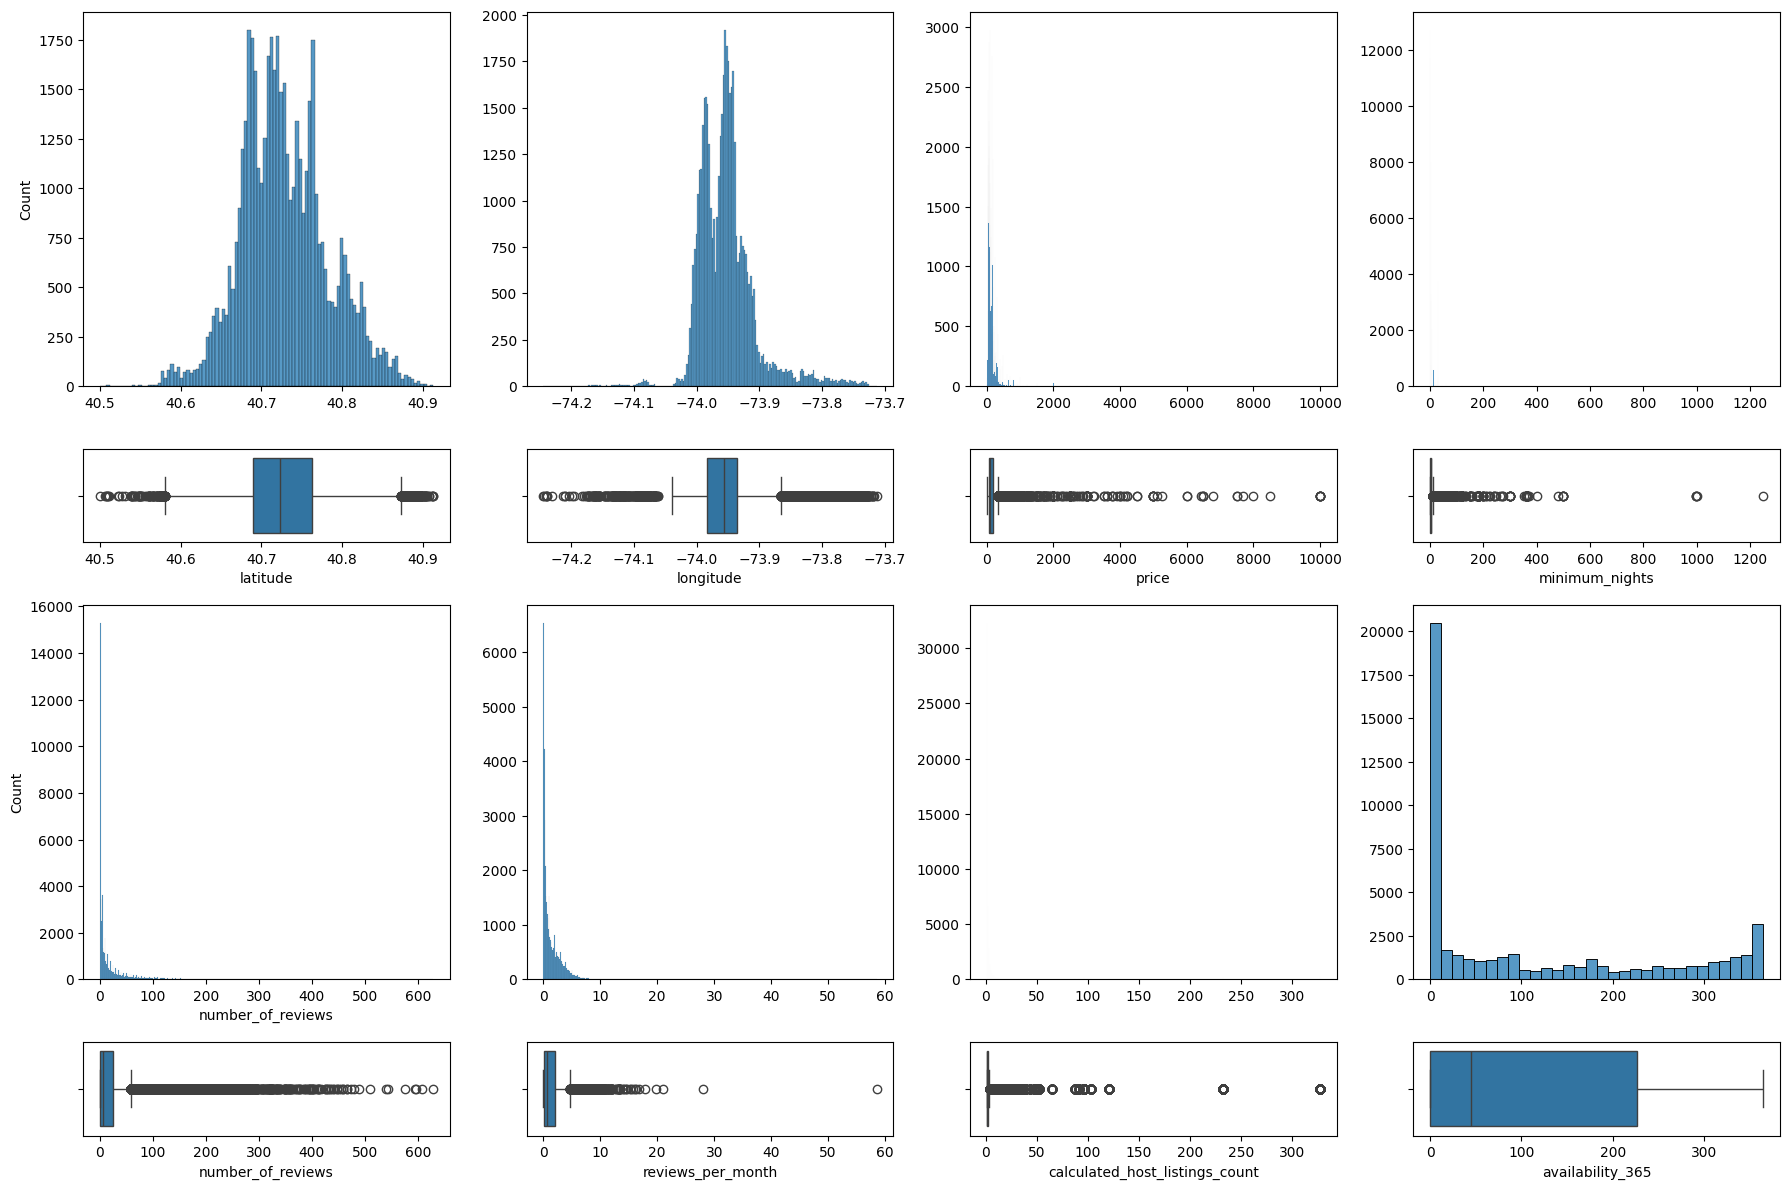

In [67]:
fig, axis = plt.subplots(4, 4, figsize = (18, 12), gridspec_kw={'height_ratios': [4, 1, 4, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_dataf, x = "latitude").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_dataf, x = "latitude")

sns.histplot(ax = axis[0, 1], data = total_dataf, x = "longitude").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_dataf, x = "longitude")

sns.histplot(ax = axis[0, 2], data = total_dataf, x = "price").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_dataf, x = "price")

sns.histplot(ax = axis[0, 3], data = total_dataf, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_dataf, x = "minimum_nights")



sns.histplot(ax = axis[2, 0], data = total_dataf, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_dataf, x = "number_of_reviews")

sns.histplot(ax = axis[2, 1], data = total_dataf, x = "reviews_per_month").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_dataf, x = "reviews_per_month")

sns.histplot(ax = axis[2, 2], data = total_dataf, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_dataf, x = "calculated_host_listings_count")

sns.histplot(ax = axis[2, 3], data = total_dataf, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = total_dataf, x = "availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Análisis de variables multivariante

### Análisis numérico-numérico

Tomaremos el dato "price" como variable objetivo

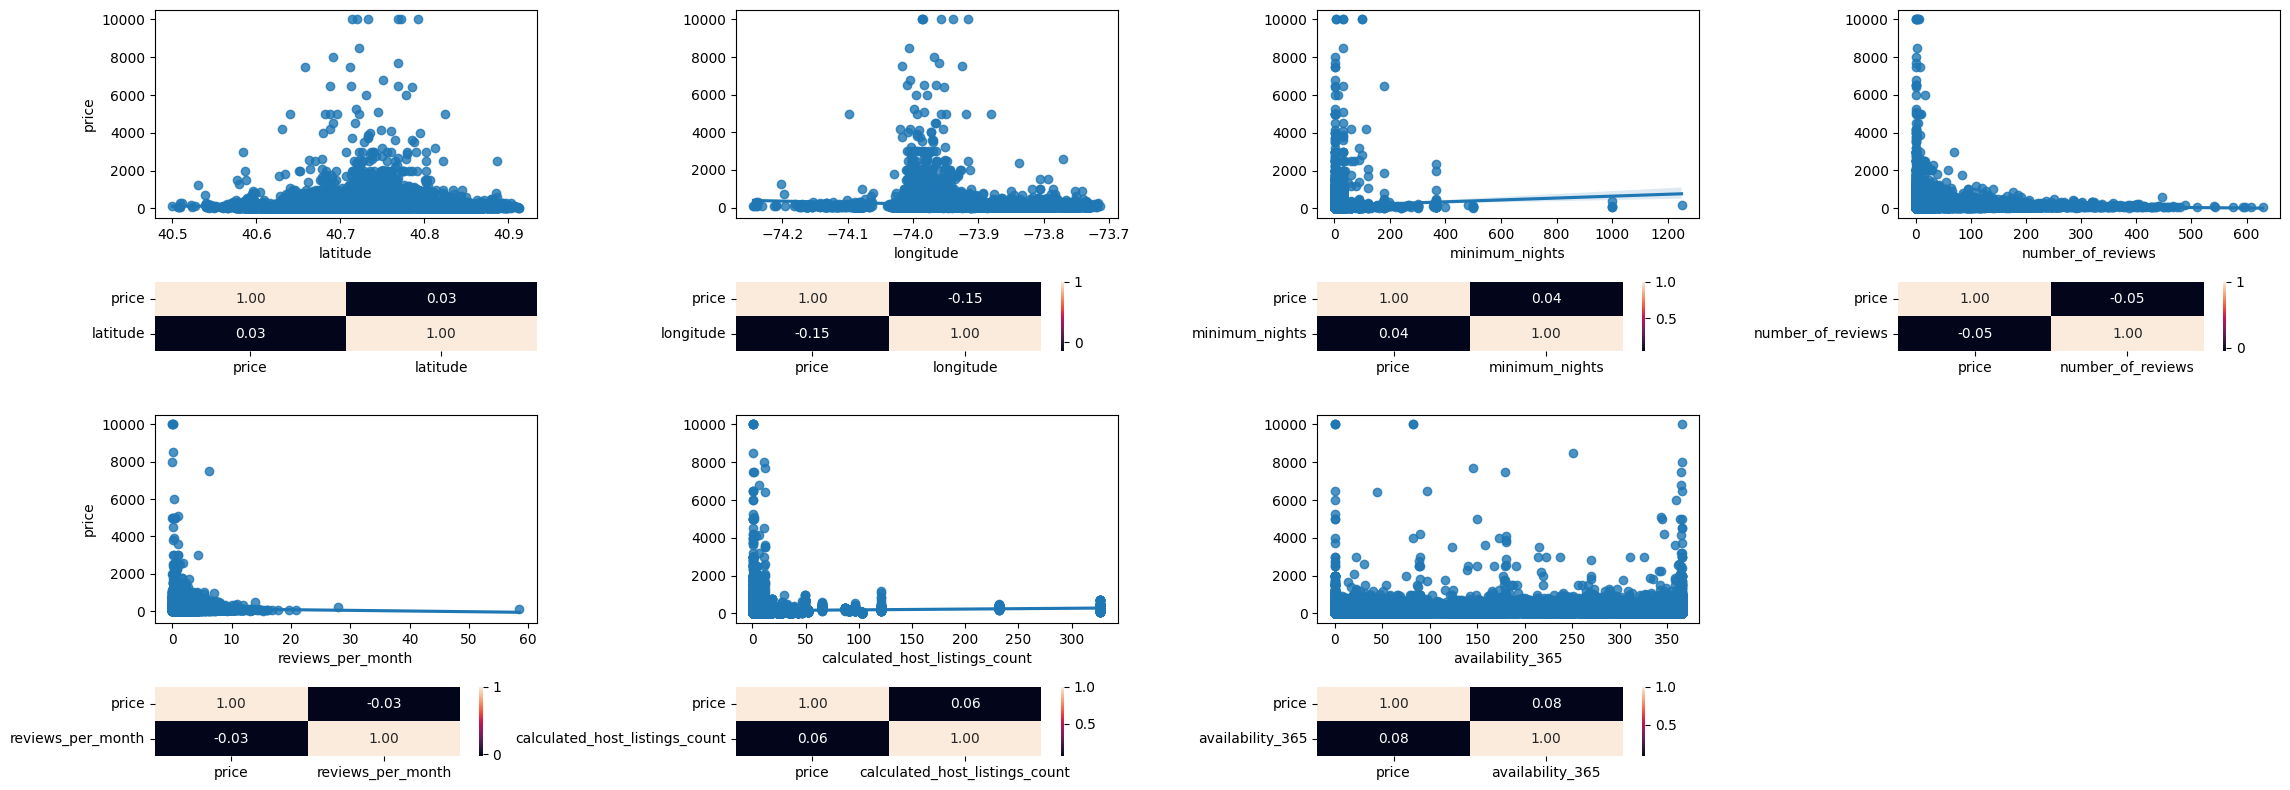

In [68]:
fig, axis = plt.subplots(4, 4, figsize = (23, 8), gridspec_kw={'height_ratios': [3, 1, 3, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "latitude", y = "price")
sns.heatmap(total_dataf[["price", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "longitude", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

sns.regplot(ax = axis[0, 3], data = total_dataf, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3])



sns.regplot(ax = axis[2, 0], data = total_dataf, x = "reviews_per_month", y = "price")
sns.heatmap(total_dataf[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = total_dataf, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[2, 2], data = total_dataf, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2])

fig.delaxes(axis[2, 3])
fig.delaxes(axis[3, 3])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Se puede apreciar que no existe una relación directa entre el precio (price) y las distintas variables numéricas. Aunque algunos sí estan relacionados como podría ser el caso de "latitude", "minimum_nights", "calculated_listings_host_count" y "availability_365" que tienen una ligera influencia a la hora de aumentar el precio siendo "availability_365" el que mas influencia tiene comparado con el resto.

Por otro lado, existe una relación negativa lineal con "longitud", "number_of_reviews" y "reviews_per_month" frente a la variable objetivo contrario a lo que normalmente se pensaría.

En resumen, aunque algunas varibles numéricas influyen en la variable objetivo, ninguna representa un facto decisivo a la hora de determinar el precio de un alojamiento de AirBnB en Nueva York.

#### availability_365-reviews_per_month | calculated_host_listings_count-number_of_reviews | minimum_nights-number_of_reviews

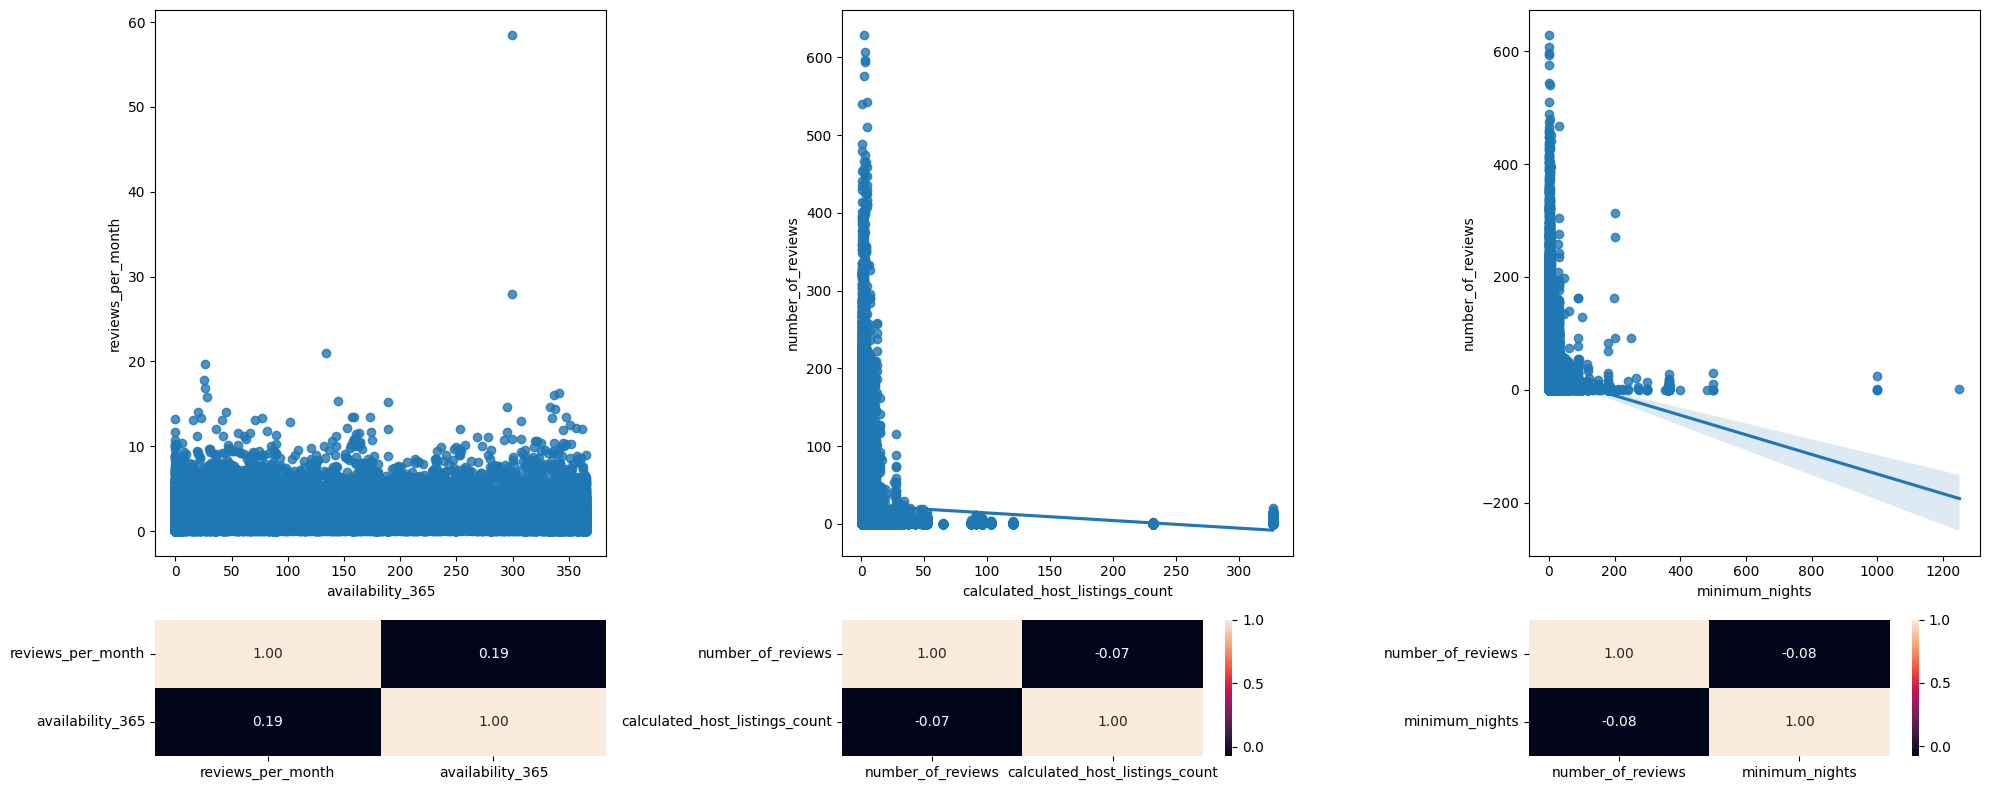

In [69]:
fig, axis = plt.subplots(2, 3, figsize = (20, 8), gridspec_kw={'height_ratios': [4, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "availability_365", y = "reviews_per_month")
sns.heatmap(total_dataf[["reviews_per_month", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "calculated_host_listings_count", y = "number_of_reviews")
sns.heatmap(total_dataf[["number_of_reviews", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "minimum_nights", y = "number_of_reviews")
sns.heatmap(total_dataf[["number_of_reviews", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Combinaciones post-mapa de calor

Una vez realizado el mapa de calor, se comprobó una relación de 0.55 entre number_of_reviews y reviews_per_month que refleja lo que se esperaría ya que si tienes muchas reviews, lo natural es que tengas un buen número por mes.  
Y 0.23 entre calculated_host_listings_count con availability_365 también lo normal ya que cuantos más anuncios tengas publicados, más probable es que tenga varias disponibles todos los días del año.

### Análisis categórico-categórico

No se puede realizar un primer análisis con la variable objetivo ya que no sería lógico factorizar "price" por la gran cantidad de valores que crearía. Por lo tanto, seguiremos con el análisis.

### Combinaciones de la clase con varias predictoras

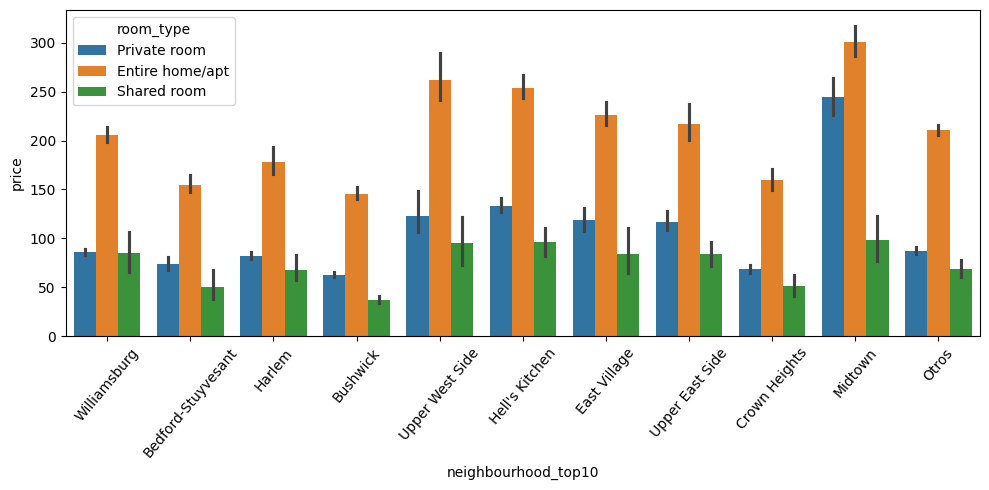

In [70]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)

sns.barplot(data = total_dataf, x = "neighbourhood_top10", y = "price", hue = "room_type", order = list(top10) + ["Otros"])
axis.tick_params(axis="x", rotation=50)

plt.tight_layout()

plt.show()

## Análisis de correlaciones (completo)

### Factorizar las variables categóricas

In [77]:

lista_a_factorizar = ["neighbourhood", "neighbourhood_top10", "neighbourhood_group", "room_type"]

for var in lista_a_factorizar:
  url_transformado = "../data/processed/" + var + "_transformation_rules.json"
  var_n = var+"_n"

  total_dataf[var_n] = pd.factorize(total_dataf[var])[0]
  total_dataf[[var_n, var]]

  transformation_rules = {row[var]: row[var_n] for index, row in total_dataf[[var_n, var]].drop_duplicates().iterrows()}

  with open(url_transformado, "w") as f:
    json.dump(transformation_rules, f)

#### Mapa de calor

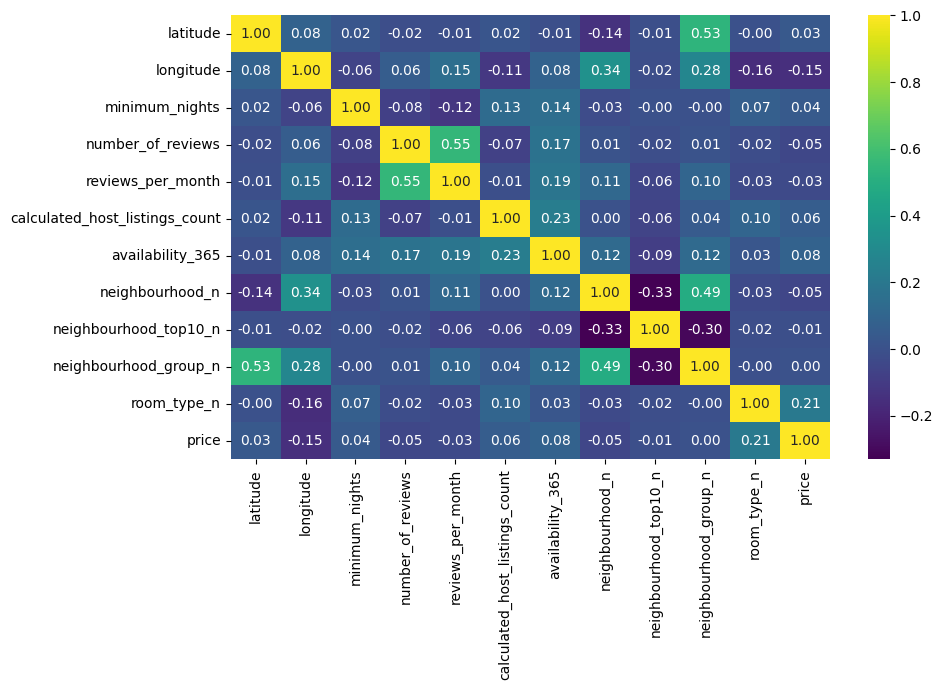

In [79]:
cols_num = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "neighbourhood_n", "neighbourhood_top10_n",
            "neighbourhood_group_n", "room_type_n", "price"]  # todas numéricas
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(total_dataf[cols_num].corr(method="pearson"), annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.tight_layout()
plt.show()
   


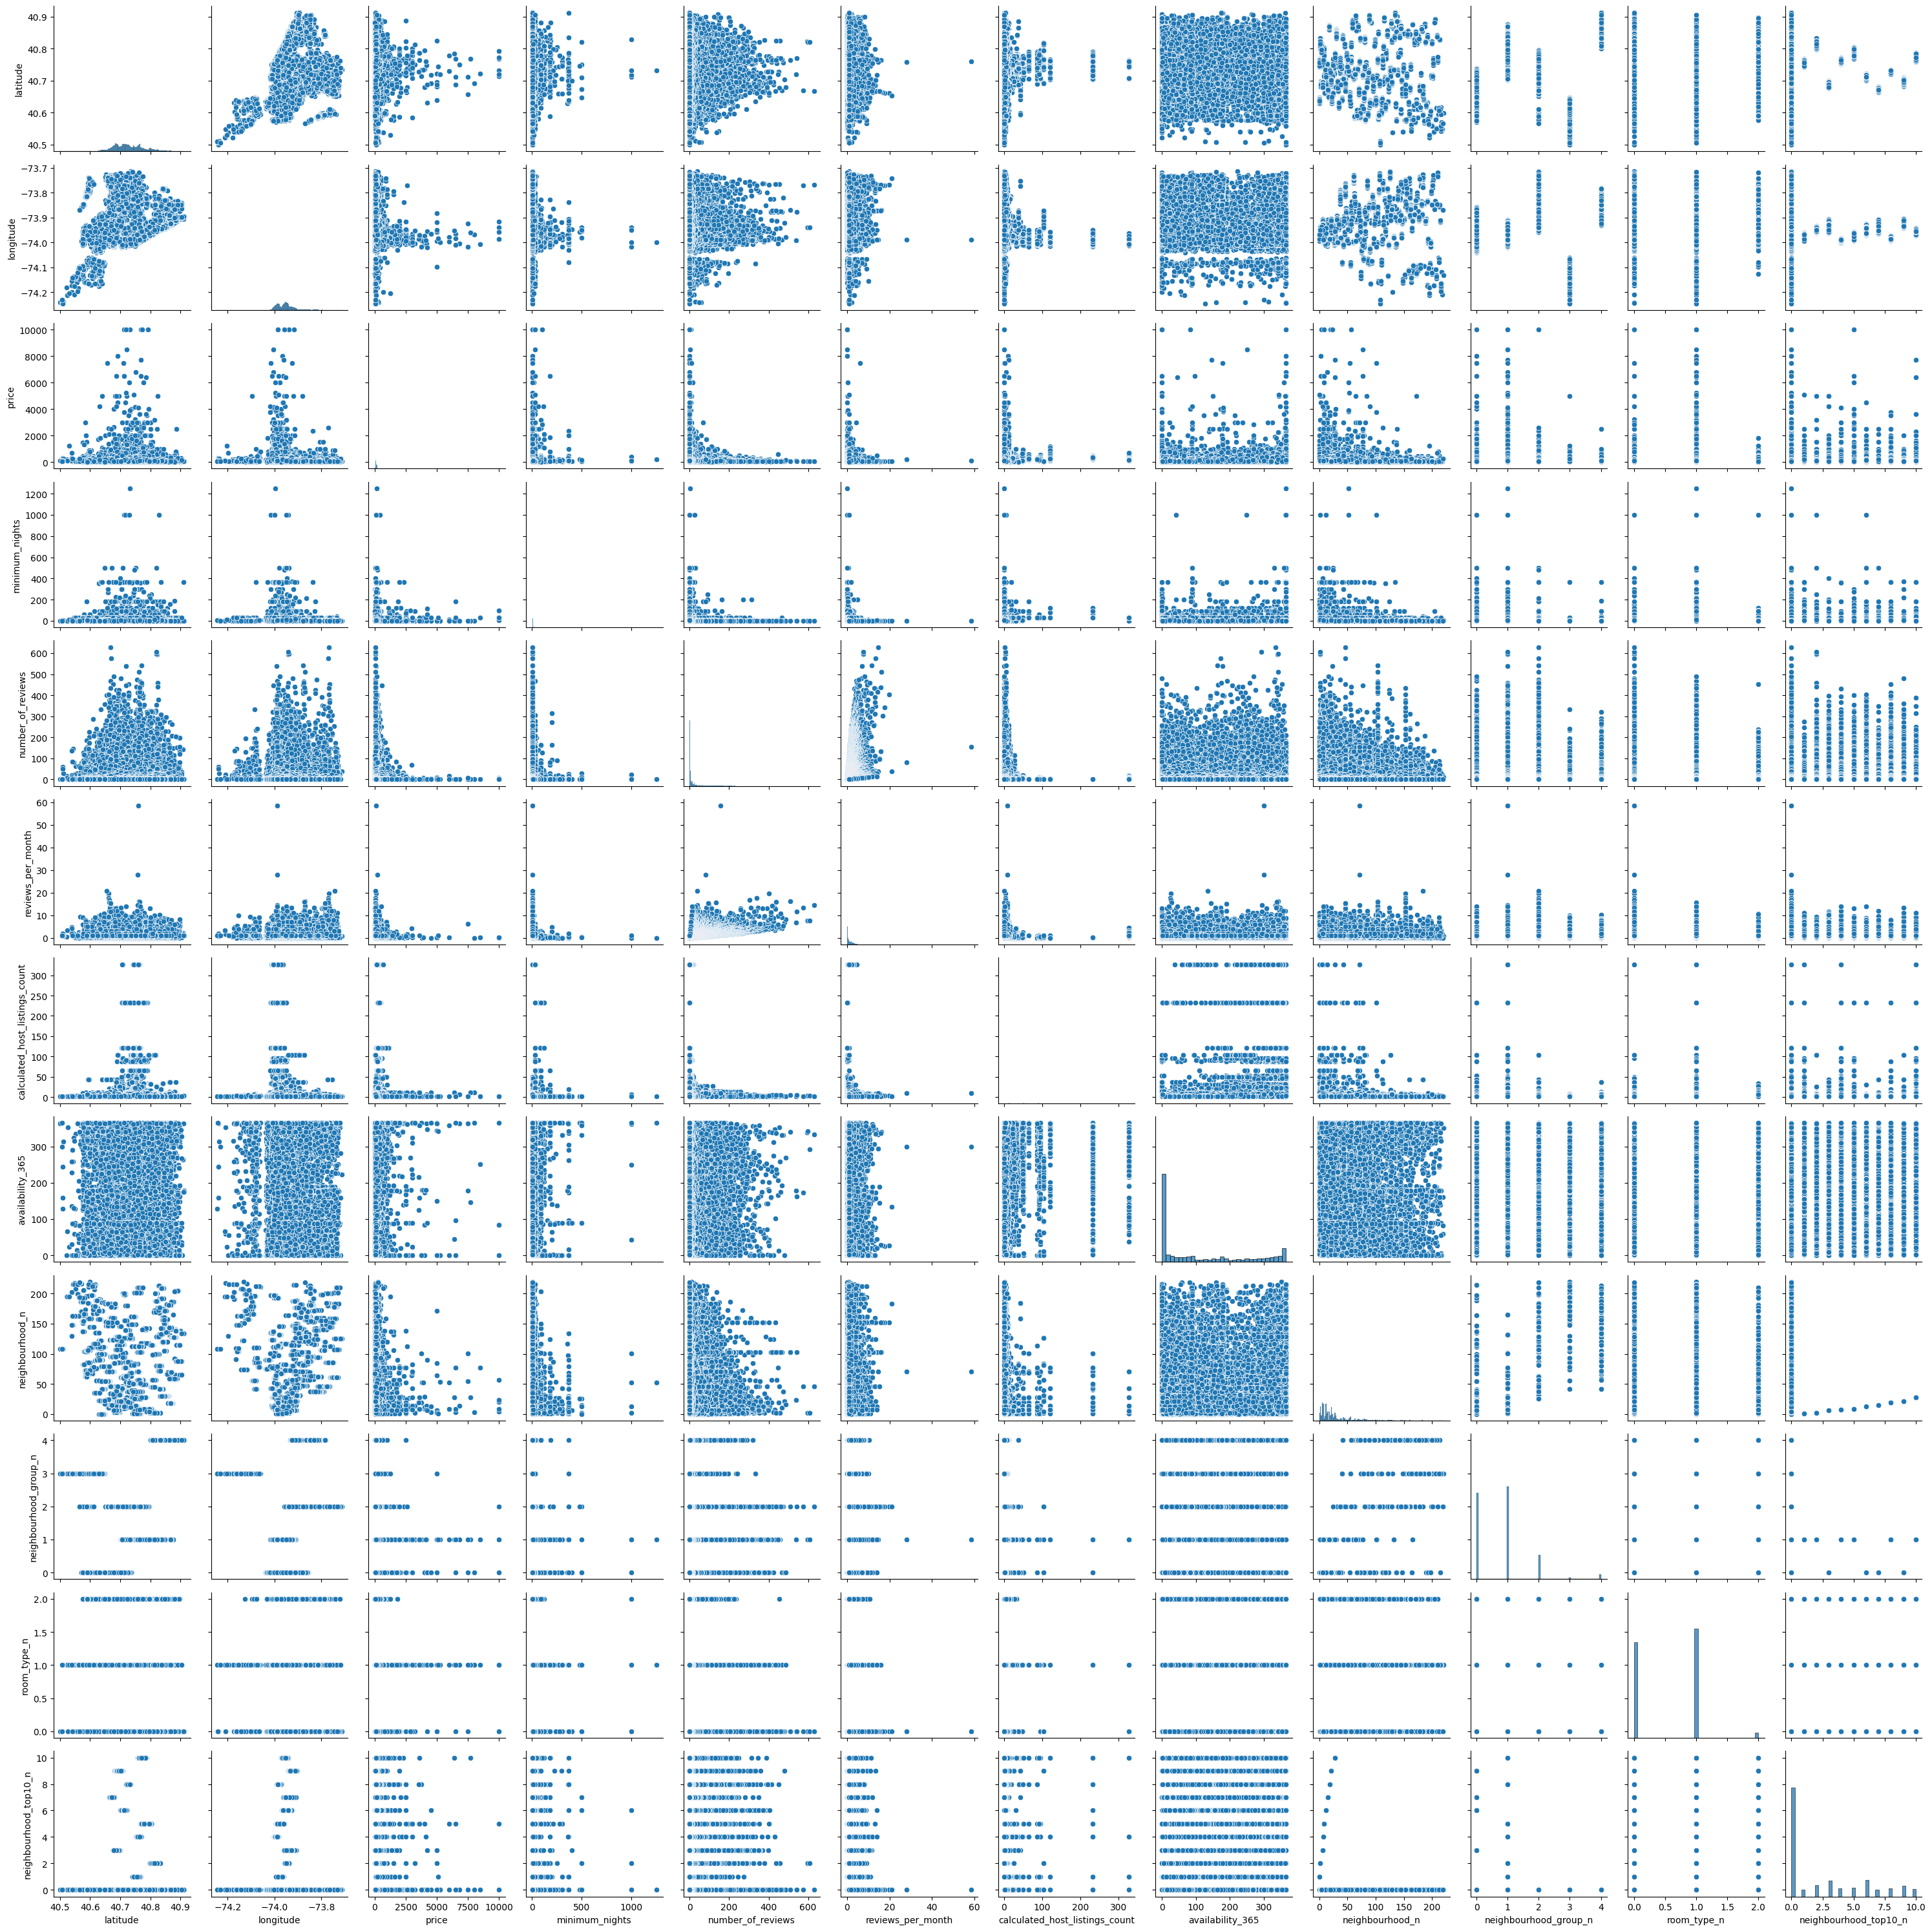

In [80]:
sns.pairplot(data = total_dataf)
plt.tight_layout()
plt.show()

## Ingeniería de características

### Análisis de outliers

In [82]:
FINAL_COLS = ["latitude", "longitude", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "neighbourhood_n", "neighbourhood_top10_n",
            "neighbourhood_group_n", "room_type_n", "price"]
total_dataf = total_dataf[FINAL_COLS]
total_dataf.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_n,neighbourhood_top10_n,neighbourhood_group_n,room_type_n,price
count,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,7.029962,23.274466,1.373221,7.143982,112.781327,29.888782,2.559505,0.786911,0.567113,152.720687
std,0.054530,0.046157,20.510550,44.550582,1.680442,32.952519,131.622289,34.676634,3.266514,0.844386,0.541249,240.154170
min,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,1.000000,1.000000,0.190000,1.000000,0.000000,7.500000,0.000000,0.000000,0.000000,69.000000
50%,40.723070,-73.955680,3.000000,5.000000,0.720000,1.000000,45.000000,19.000000,0.000000,1.000000,1.000000,106.000000
75%,40.763115,-73.936275,5.000000,24.000000,2.020000,2.000000,227.000000,37.000000,5.000000,1.000000,1.000000,175.000000
max,40.913060,-73.712990,1250.000000,629.000000,58.500000,327.000000,365.000000,220.000000,10.000000,4.000000,2.000000,10000.000000


In [ ]:

# TENEMOS QUE GUARDARNOS TODOS LOS DATASETS, ES DECIR:

total_data_CON_outliers = total_dataf.copy()
total_data_SIN_outliers = total_dataf.copy() # Lo vamos a modificar. Para cada variable con outliers, reemplazamos sus valores outliers

outliers_cols = ["age", "campaign", "pdays", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m"]

def replace_outliers(column, df):
  col_stats = total_dataf[column].describe()
  col_iqr = col_stats["75%"] - col_stats["25%"]
  upper_limit = round(float(col_stats["75%"] + 1.5 * col_iqr), 2)
  lower_limit = round(float(col_stats["25%"] - 1.5 * col_iqr), 2)

  if lower_limit < 0: lower_limit = min(df[column])
  # Vamos a quitar los outliers superiores
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Vamos a quitar los outliers inferiores
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in outliers_cols:
  total_data_SIN_outliers, limits = replace_outliers(column, total_data_SIN_outliers)
  outliers_dict.update({column: limits})

with open("../data/processed/outliers_dict.json", "w") as f:
  json.dump(outliers_dict, f)

### Análisis de valores faltantes

### Inferencia de nuevas características

In [ ]:
365 a "si" 365 y "no" 365

df['host_type'] = df['calculated_host_listings_count'].apply(
    lambda x: 'single_host' if x == 1 else 'multi_host'
)